In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
from sklearn.datasets import make_blobs

In [5]:
X,y = make_blobs(n_samples=1000,n_features=3,centers=4,cluster_std=1,shuffle=True,random_state=1)
range_n_clusters = [2,3,4,5,6]

In [6]:
X

array([[-3.87902799, -7.2644429 , -8.80783127],
       [-2.82802505, -6.96082879, -7.62522468],
       [-0.06234273, -2.82521017,  2.13861516],
       ...,
       [-0.50427202,  4.84465622, -8.87538418],
       [-0.04849291, -1.09125877,  3.65900745],
       [-4.95985498, -3.10704299, -1.77364597]])

In [7]:
y

array([1, 1, 3, 3, 1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 2, 2, 1, 0, 0, 0, 1,
       0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 3, 0, 2, 1, 3, 3, 1, 3,
       1, 2, 0, 2, 3, 0, 0, 0, 0, 1, 2, 3, 2, 1, 1, 0, 3, 0, 0, 3, 0, 0,
       1, 0, 1, 0, 2, 1, 0, 3, 0, 3, 2, 2, 3, 3, 1, 1, 1, 0, 3, 2, 1, 3,
       1, 0, 3, 1, 1, 0, 2, 2, 2, 3, 1, 0, 2, 2, 2, 1, 1, 1, 0, 3, 0, 3,
       3, 2, 1, 0, 3, 3, 0, 3, 0, 1, 0, 2, 1, 1, 1, 3, 3, 2, 0, 3, 3, 3,
       0, 1, 2, 1, 1, 0, 3, 3, 0, 1, 1, 0, 3, 0, 0, 2, 1, 2, 2, 3, 3, 0,
       1, 0, 0, 3, 3, 2, 1, 2, 2, 2, 0, 3, 1, 0, 2, 2, 3, 3, 0, 1, 3, 2,
       2, 0, 0, 3, 3, 1, 3, 1, 2, 0, 0, 2, 3, 1, 3, 1, 0, 2, 0, 2, 1, 0,
       2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 3, 1, 0, 1, 1, 2, 3, 2,
       3, 1, 0, 0, 3, 0, 3, 3, 3, 0, 1, 3, 2, 3, 3, 0, 3, 3, 0, 3, 1, 1,
       1, 1, 0, 3, 3, 3, 1, 0, 3, 1, 0, 3, 2, 0, 3, 2, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 1, 0, 1, 0, 3, 1, 2, 3, 3, 2, 2, 1, 1, 0, 0, 3, 2, 2,
       2, 2, 3, 0, 0, 1, 3, 2, 2, 1, 2, 2, 0, 2, 2,

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

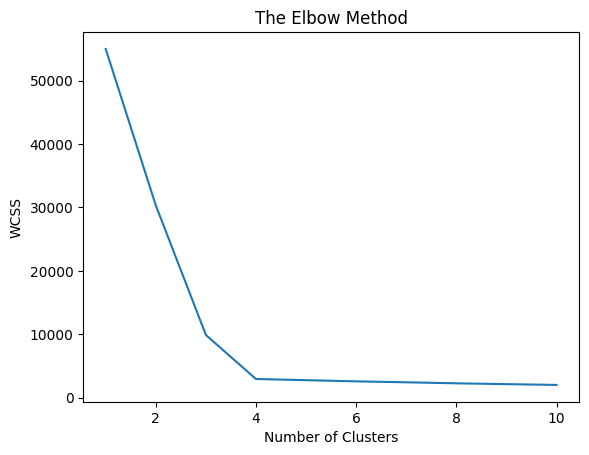

In [8]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()